# Pytorch Binary Classification

# Name : Menon Suraj Rajeev

# DS Sem 7

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d yasserh/breast-cancer-dataset

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 78.0MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/breast-cancer-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [4]:
df = pd.read_csv('/content/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df.drop('id', axis=1 , inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data analysis 

In [15]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [17]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='diagnosis', ylabel='count'>

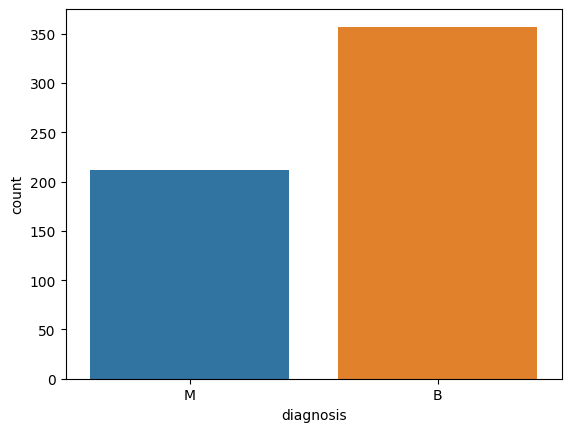

In [18]:
sns.countplot(data =df , x='diagnosis')

In [21]:
df['diagnosis'] = df['diagnosis'].map({'M':1 , 'B' :0})

# Correlatin analysis

In [47]:
corr = df.corr()
corr.iloc[0]

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

(-1.0, 1.0)

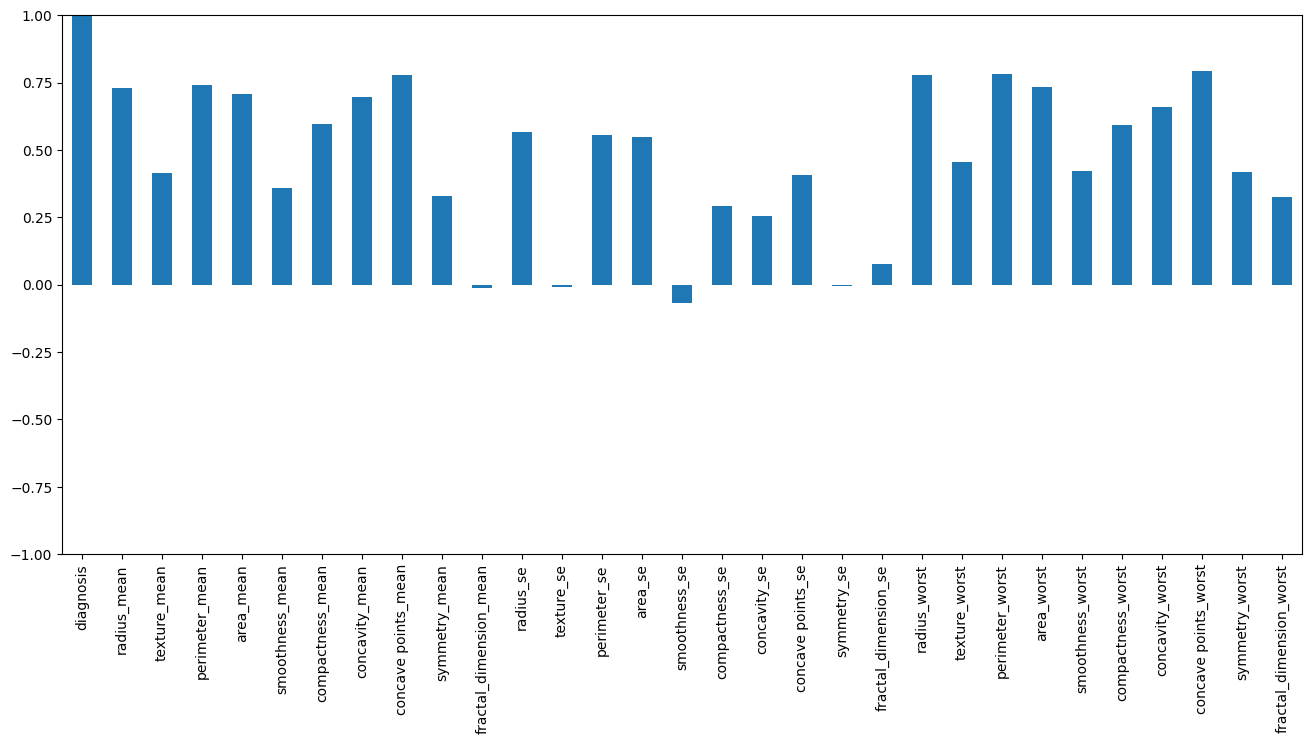

In [55]:
plt.figure(figsize = (16,7))
plot_corr = corr.iloc[0].plot(kind = 'bar')
plot_corr.set_ylim(-1,1)

# Splitting the features and target

In [103]:
X = df.drop('diagnosis',axis=1)
X.shape

(569, 30)

In [104]:
y = df['diagnosis']
y.shape

(569,)

# Distribution of features

<ipython-input-105-e94e023fdb54>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots(nrows=1,ncols=1)


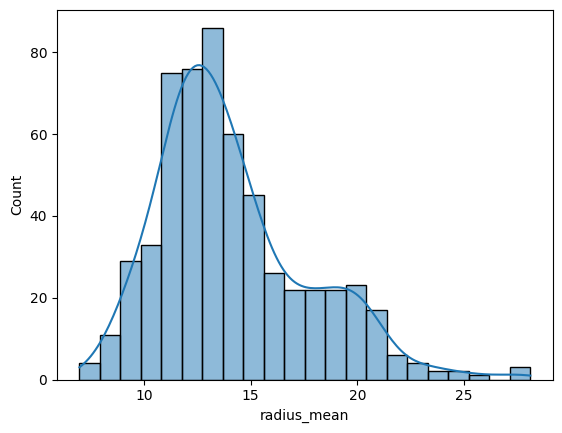

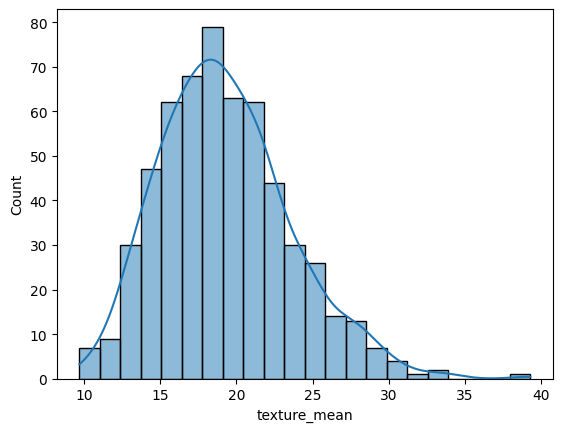

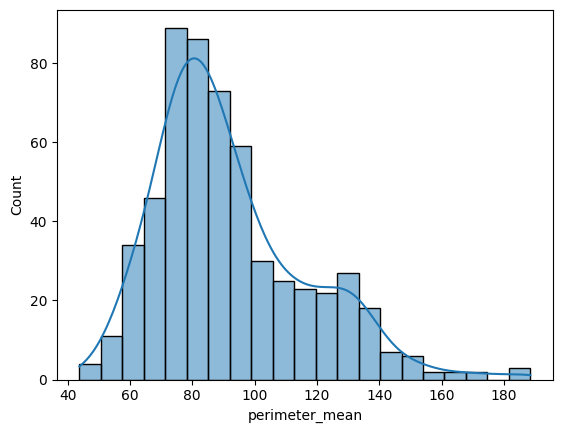

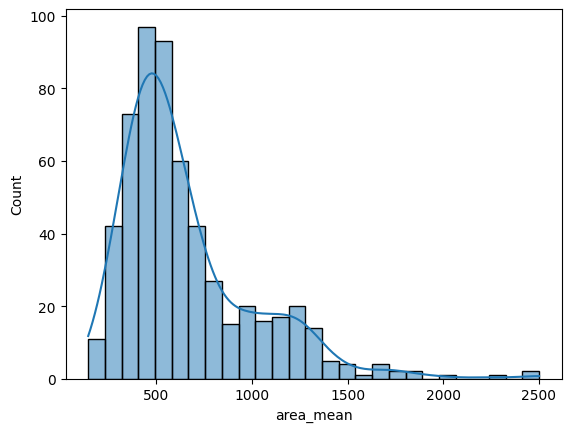

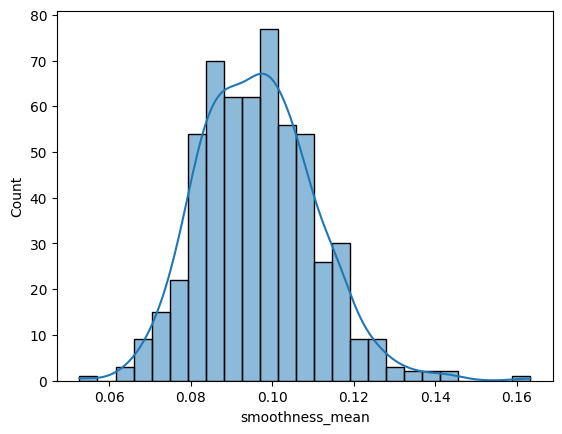

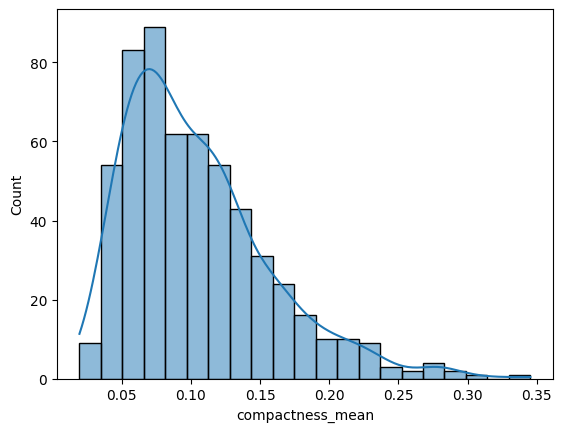

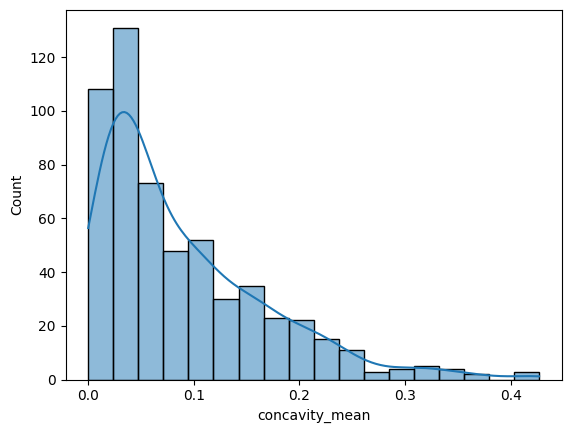

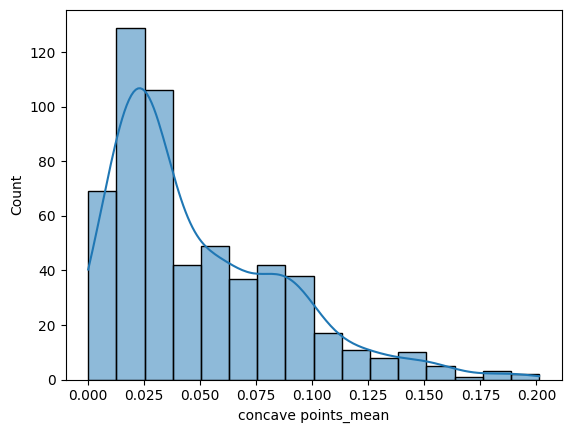

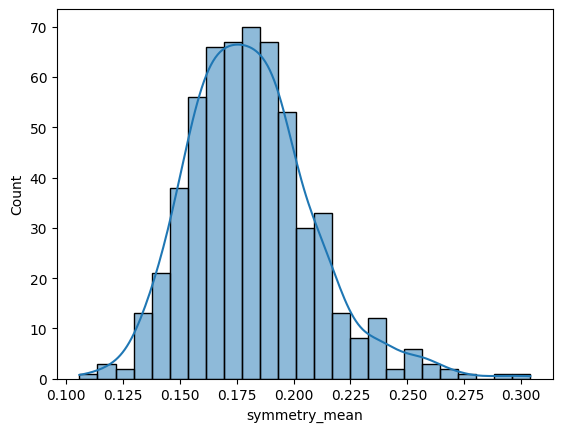

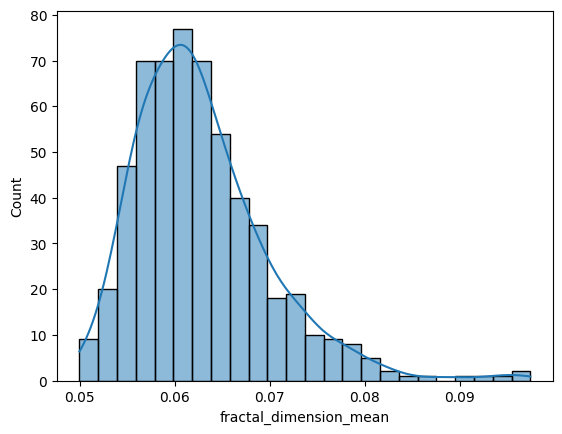

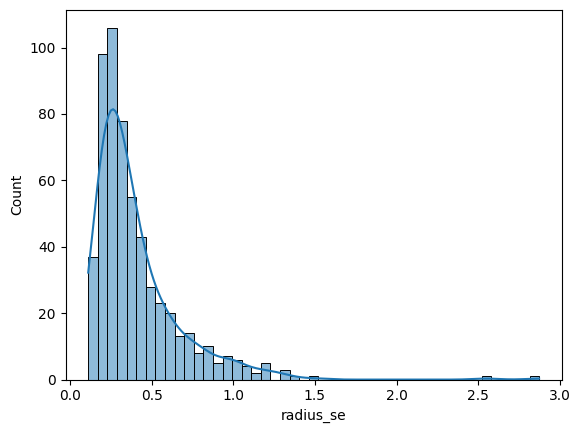

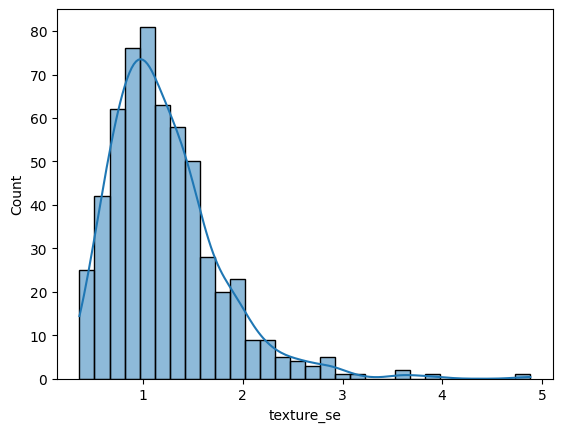

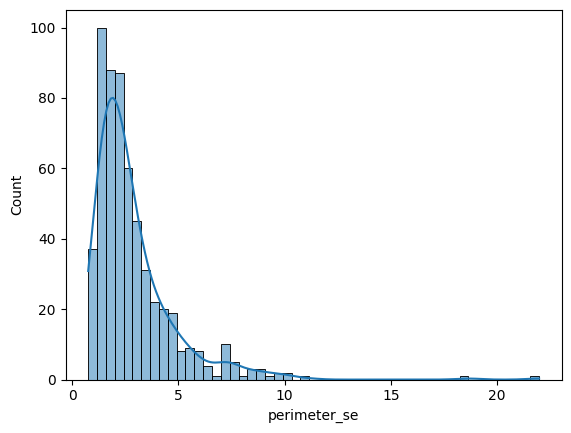

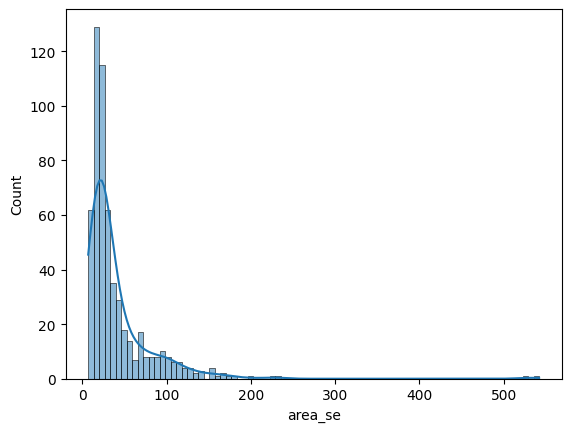

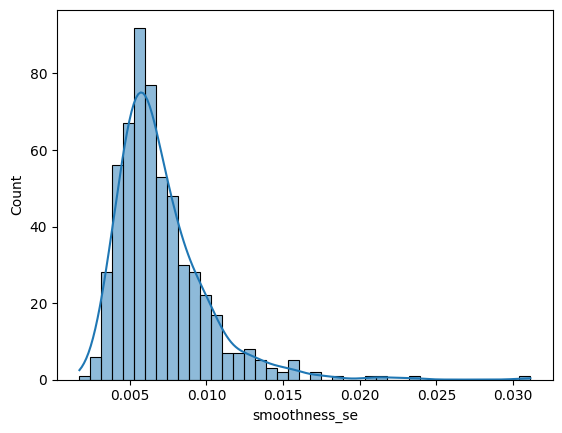

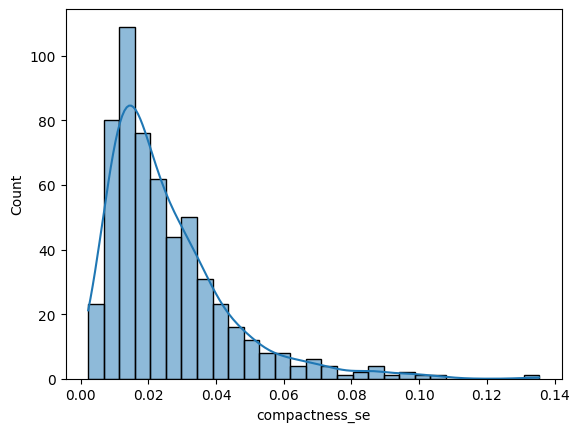

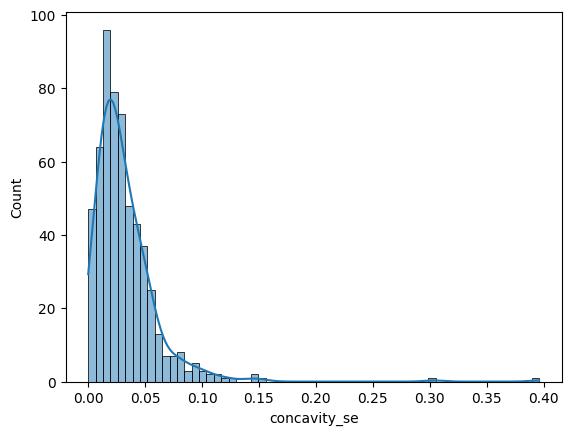

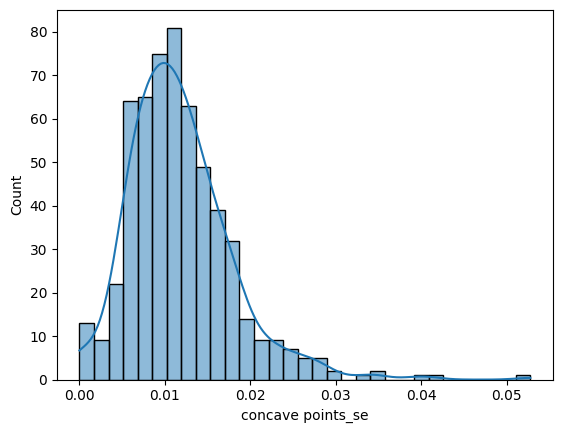

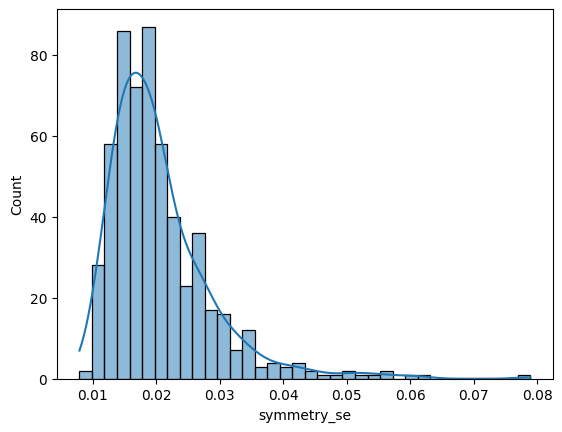

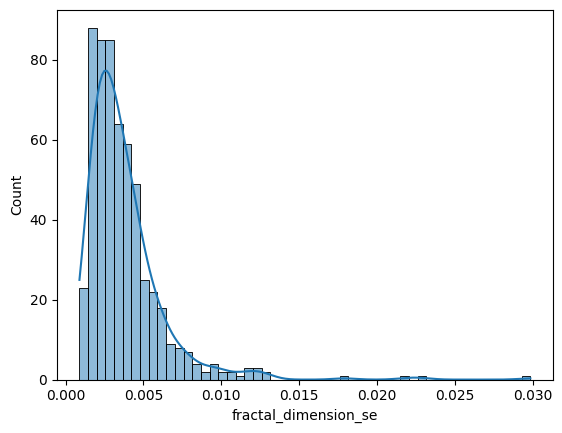

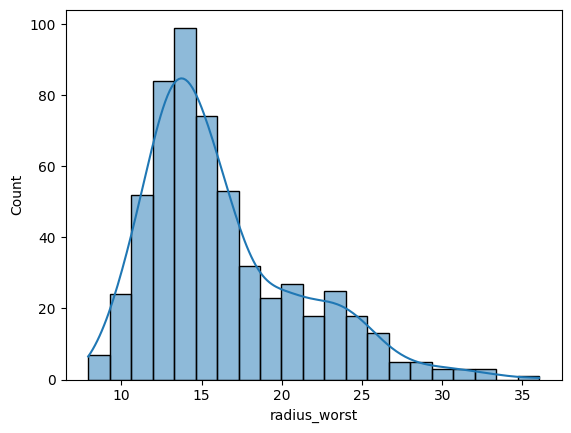

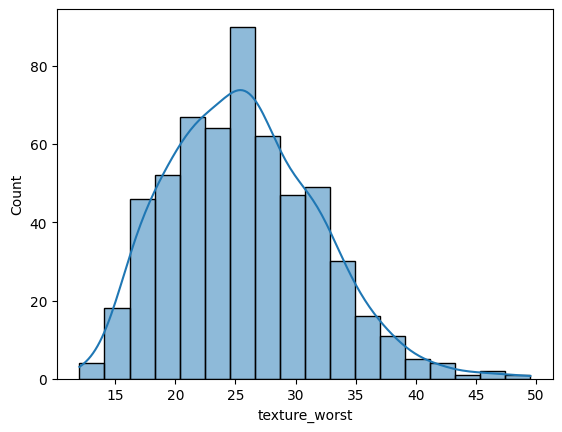

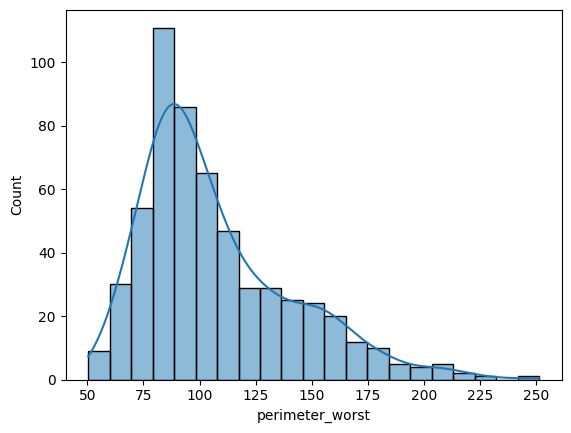

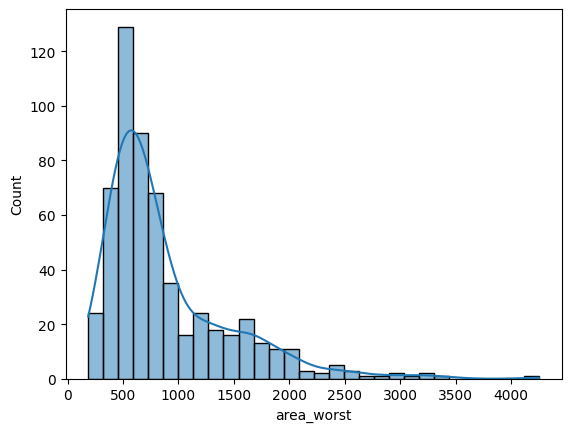

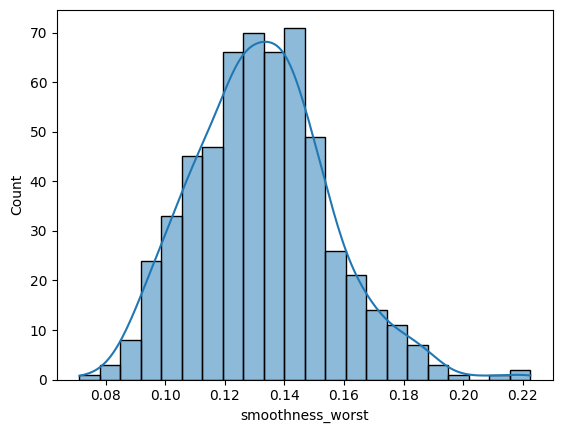

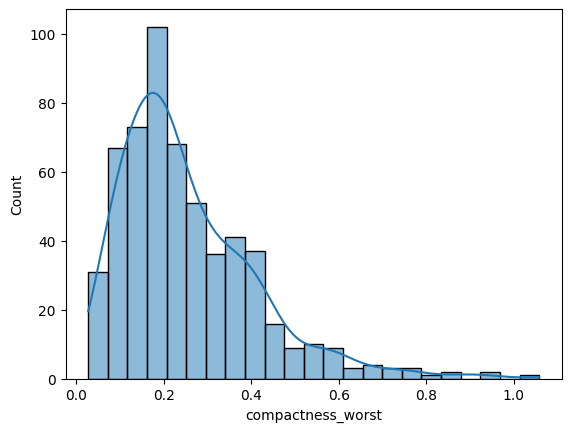

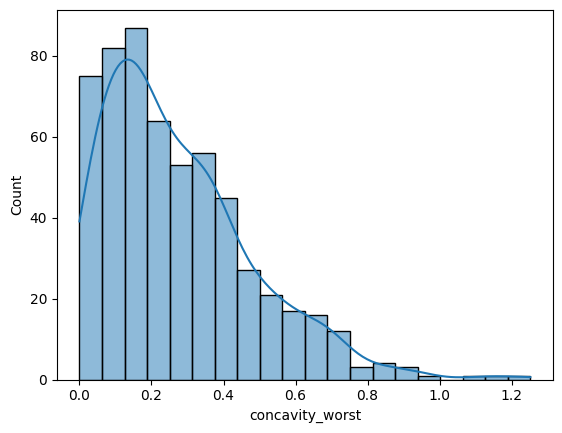

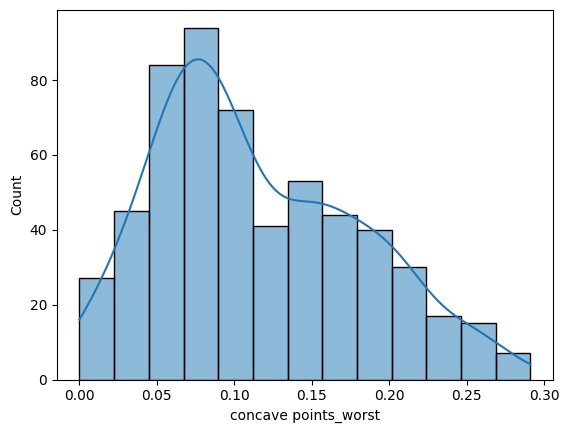

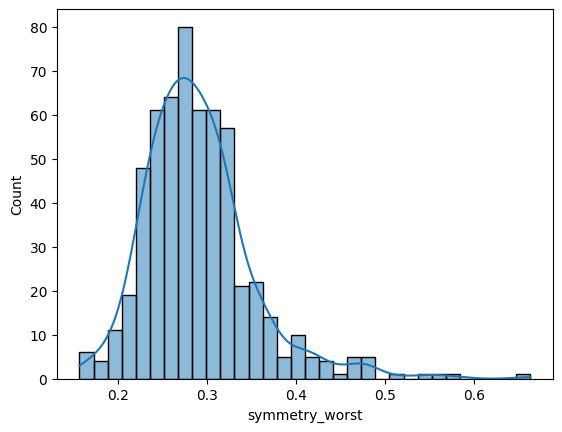

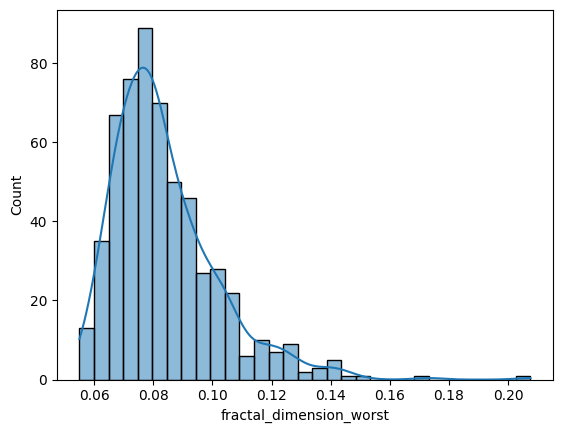

In [105]:
for col in X.columns:
  plt.subplots(nrows=1,ncols=1)
  sns.histplot(X[col],kde =True)

# Checking for outliers and treating them

<ipython-input-106-d1c0474d972e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,4))


<Figure size 600x400 with 0 Axes>

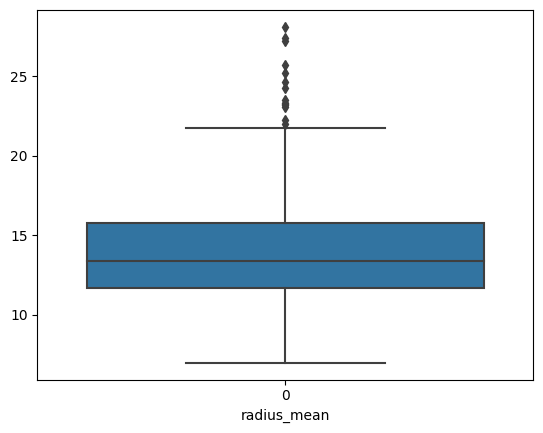

<Figure size 600x400 with 0 Axes>

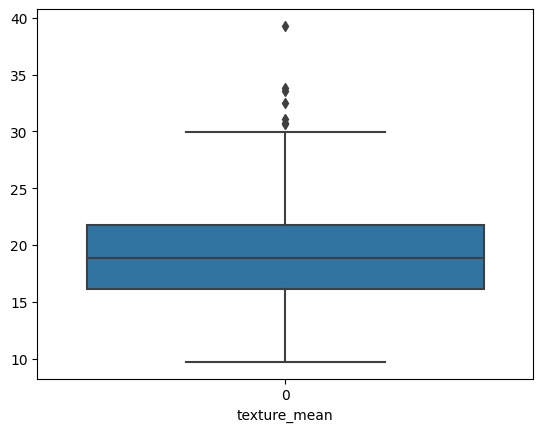

<Figure size 600x400 with 0 Axes>

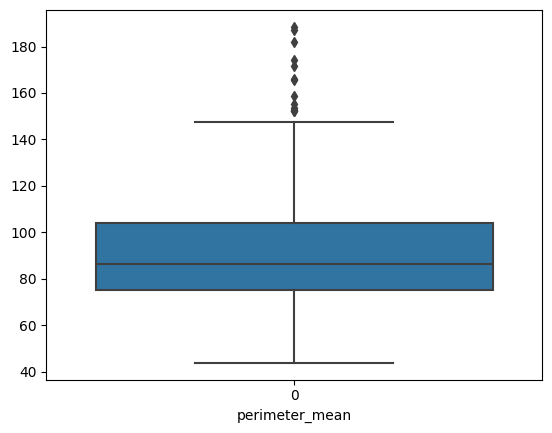

<Figure size 600x400 with 0 Axes>

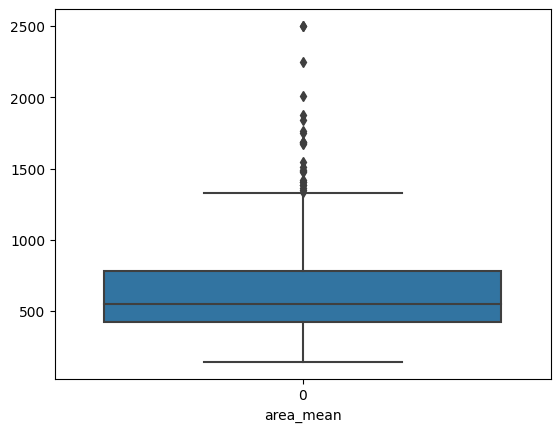

<Figure size 600x400 with 0 Axes>

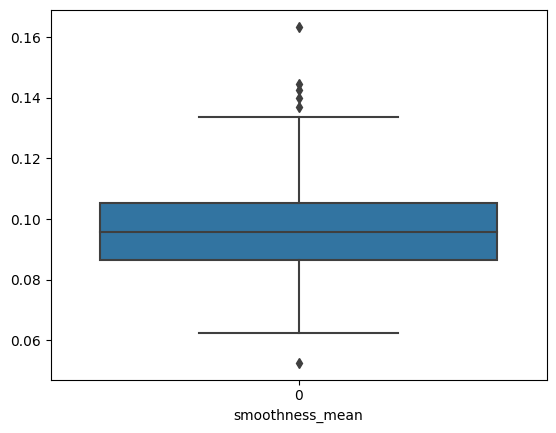

<Figure size 600x400 with 0 Axes>

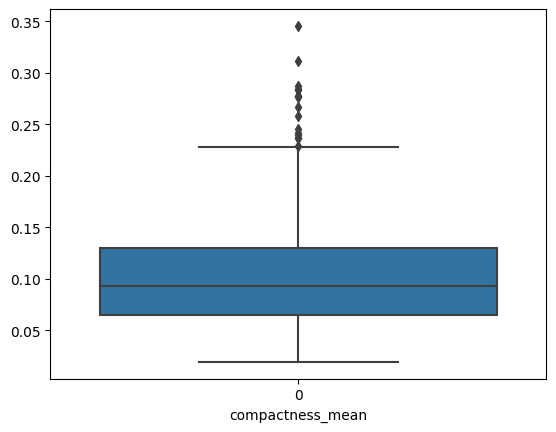

<Figure size 600x400 with 0 Axes>

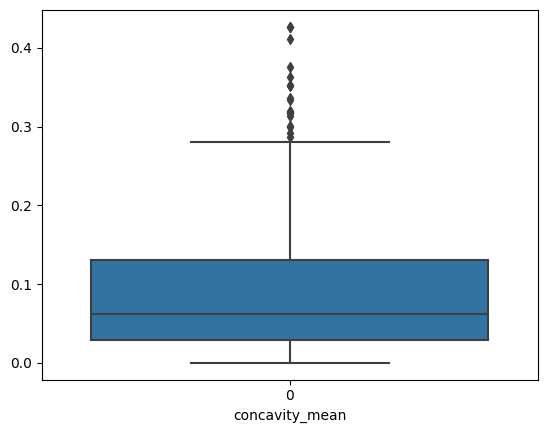

<Figure size 600x400 with 0 Axes>

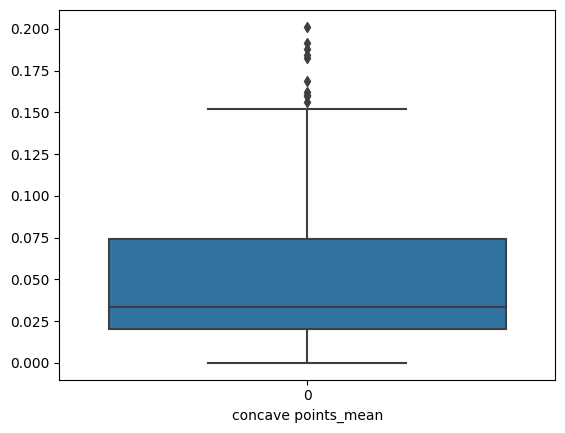

<Figure size 600x400 with 0 Axes>

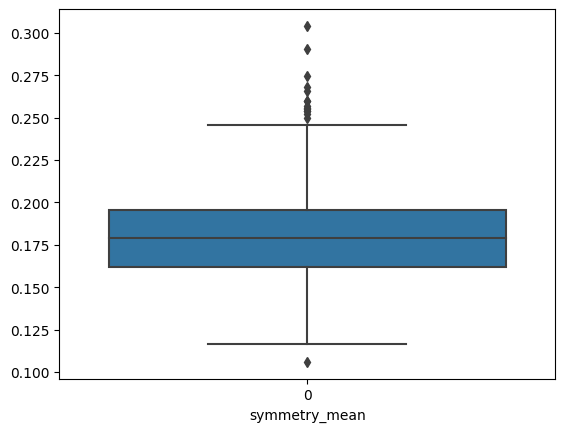

<Figure size 600x400 with 0 Axes>

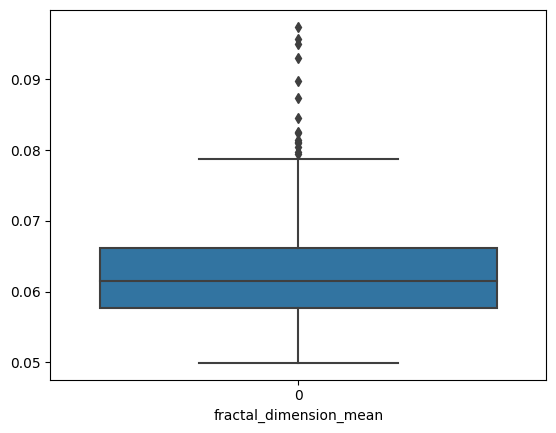

<Figure size 600x400 with 0 Axes>

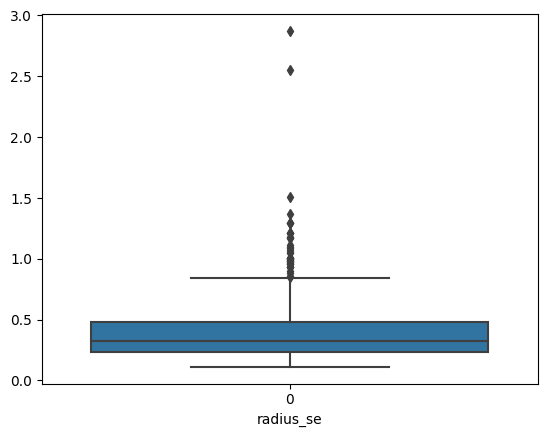

<Figure size 600x400 with 0 Axes>

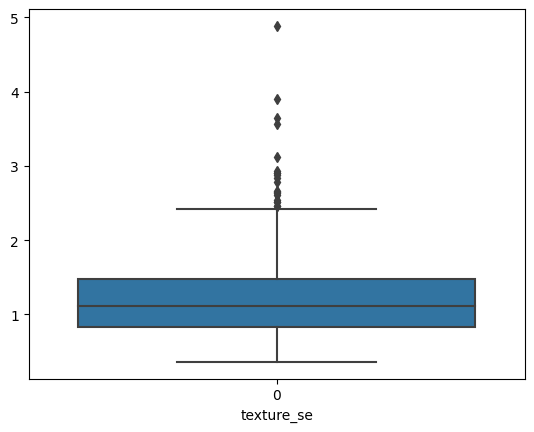

<Figure size 600x400 with 0 Axes>

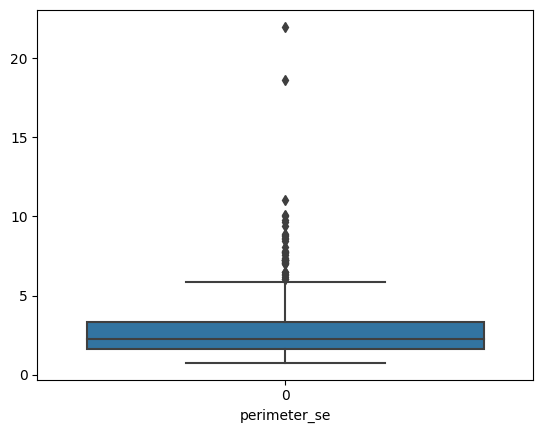

<Figure size 600x400 with 0 Axes>

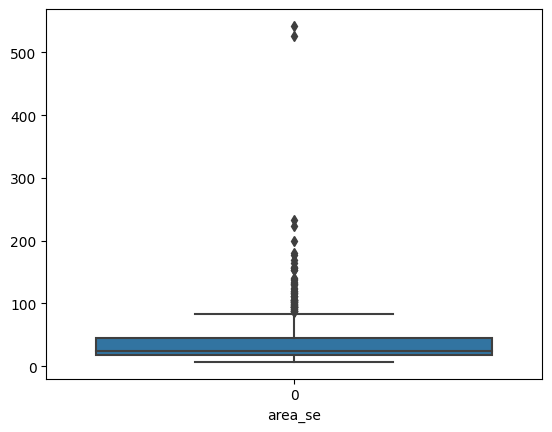

<Figure size 600x400 with 0 Axes>

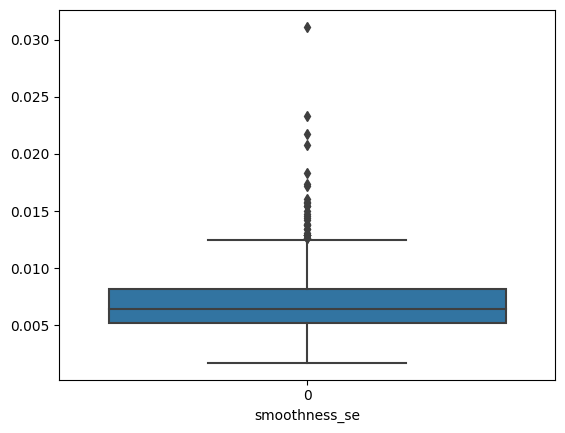

<Figure size 600x400 with 0 Axes>

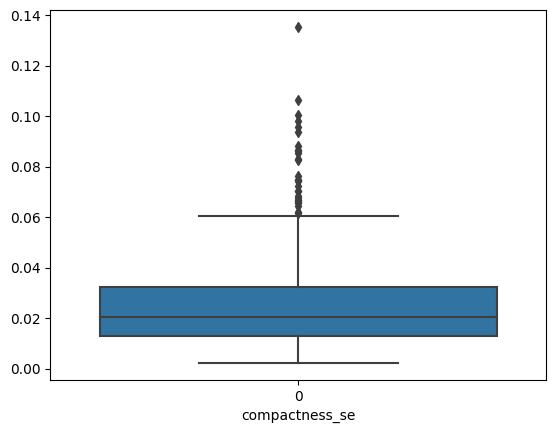

<Figure size 600x400 with 0 Axes>

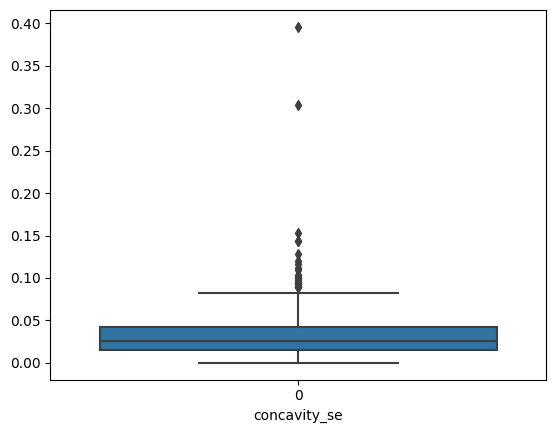

<Figure size 600x400 with 0 Axes>

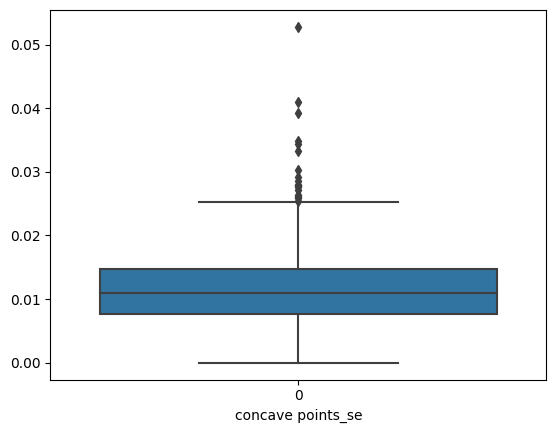

<Figure size 600x400 with 0 Axes>

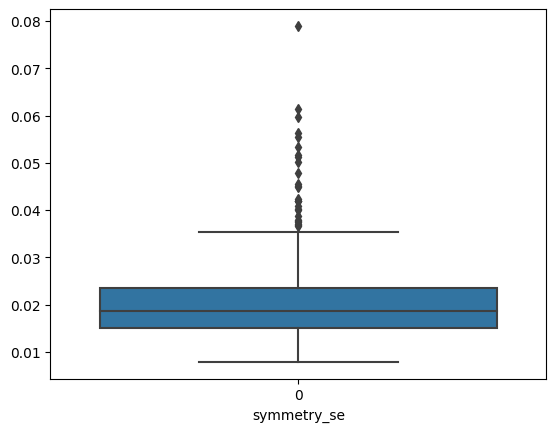

<Figure size 600x400 with 0 Axes>

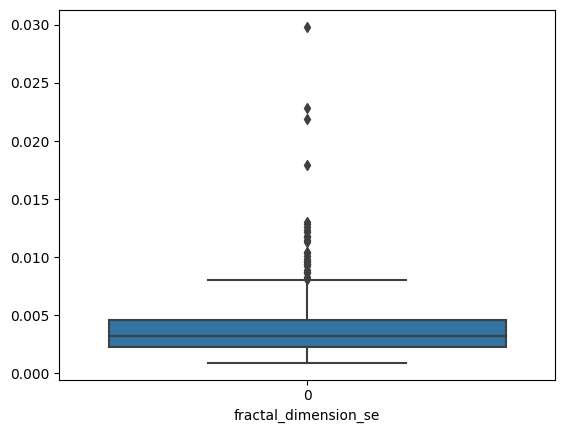

<Figure size 600x400 with 0 Axes>

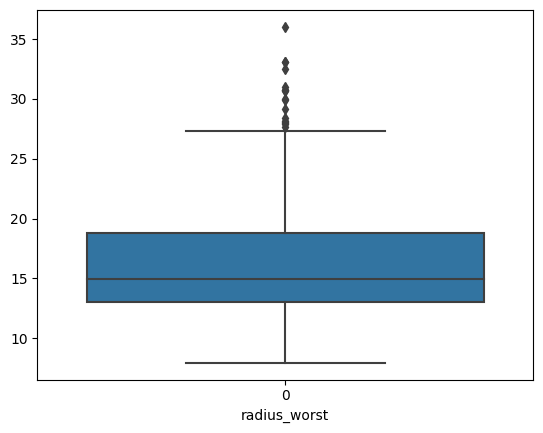

<Figure size 600x400 with 0 Axes>

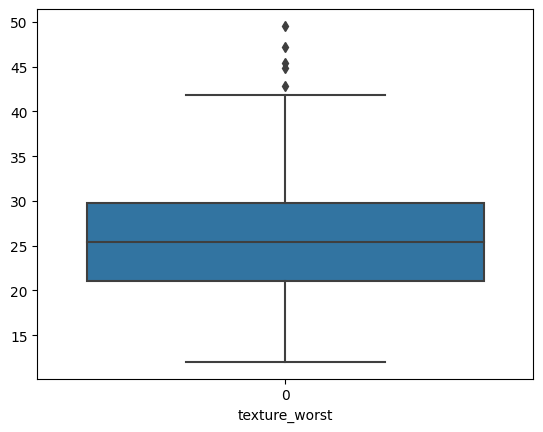

<Figure size 600x400 with 0 Axes>

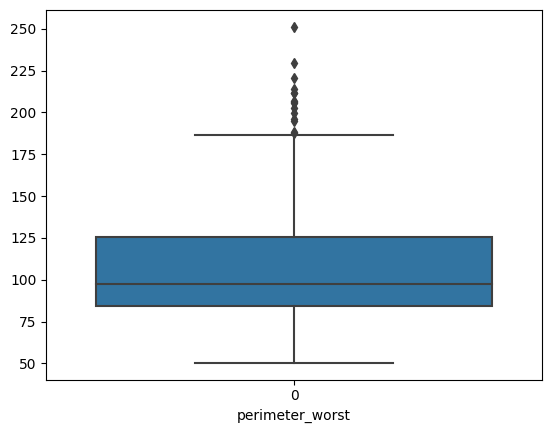

<Figure size 600x400 with 0 Axes>

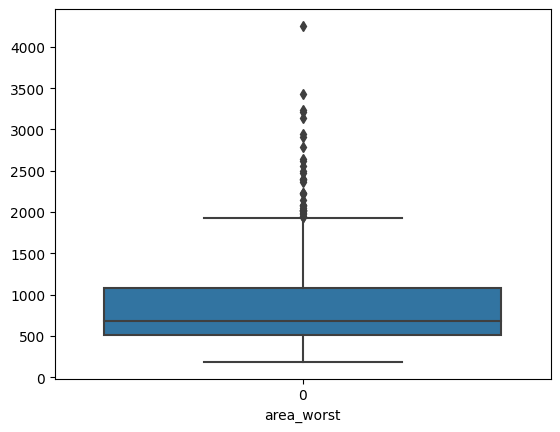

<Figure size 600x400 with 0 Axes>

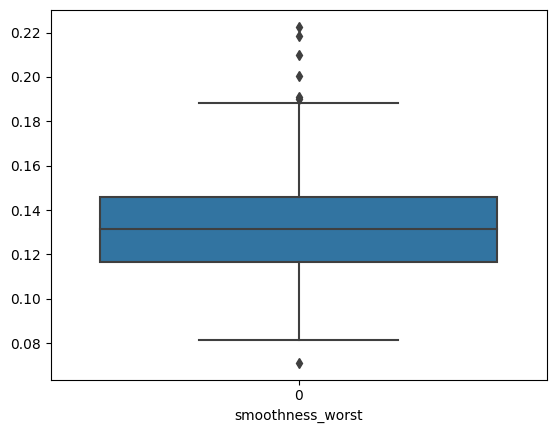

<Figure size 600x400 with 0 Axes>

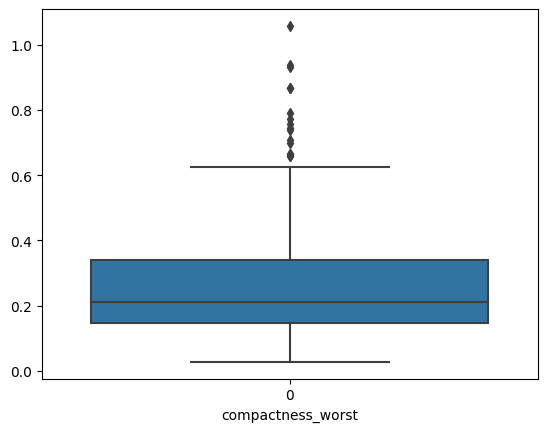

<Figure size 600x400 with 0 Axes>

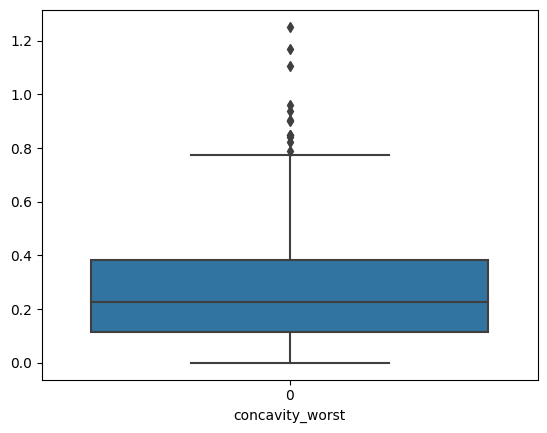

<Figure size 600x400 with 0 Axes>

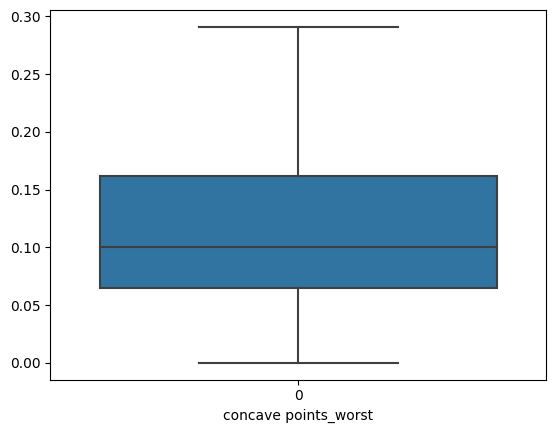

<Figure size 600x400 with 0 Axes>

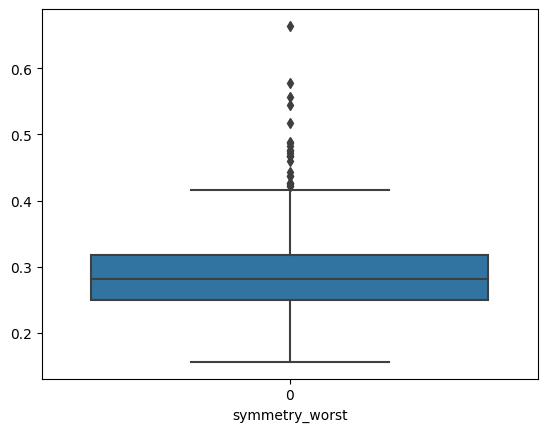

<Figure size 600x400 with 0 Axes>

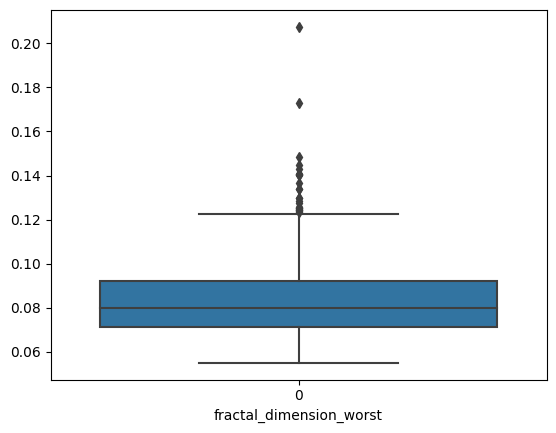

In [106]:
for col in X.columns:
  plt.figure(figsize=(6,4))
  plt.subplots(nrows=1,ncols=1)
  sns.boxplot(X[col])
  plt.xlabel(col)

In [107]:
def outlier_removal(data,cols):
  for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3-Q1
    minimum = Q1 - (1.5*IQR)
    maximum = Q3 + (1.5*IQR)
    X[col] = np.where(X[col]>maximum , maximum ,
                      np.where(X[col]<minimum , minimum , X[col]))

In [108]:
outlier_removal(X,X.columns)

<ipython-input-109-d1c0474d972e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,4))


<Figure size 600x400 with 0 Axes>

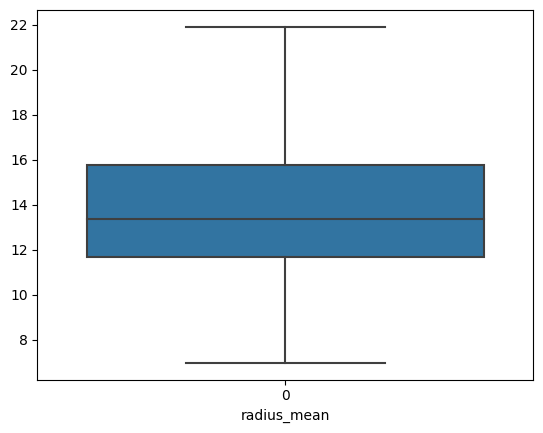

<Figure size 600x400 with 0 Axes>

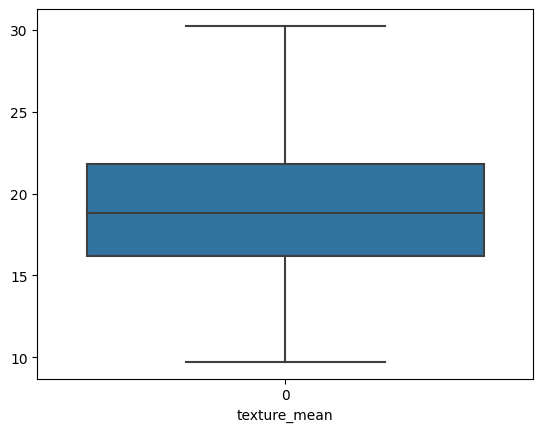

<Figure size 600x400 with 0 Axes>

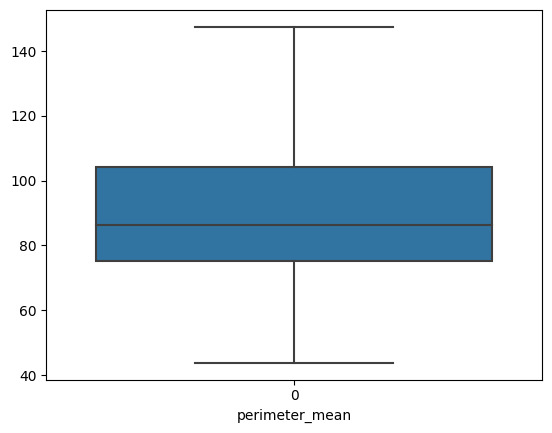

<Figure size 600x400 with 0 Axes>

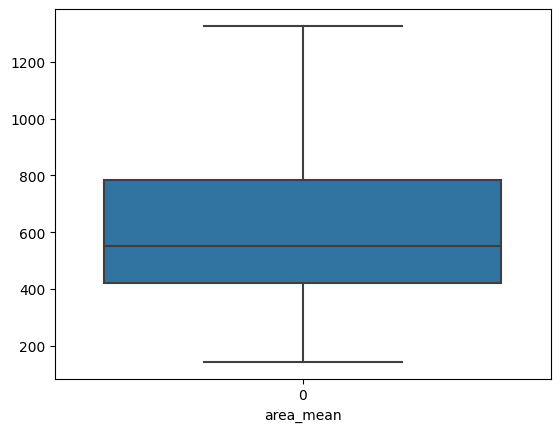

<Figure size 600x400 with 0 Axes>

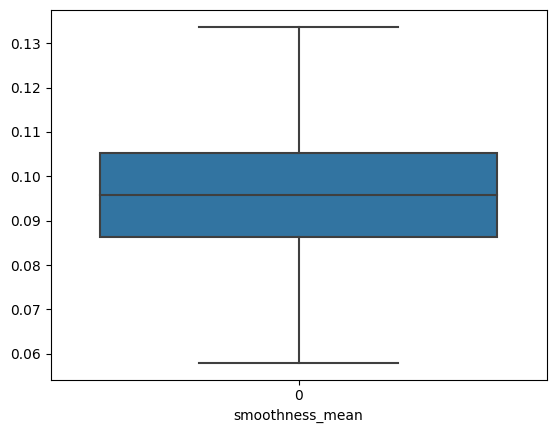

<Figure size 600x400 with 0 Axes>

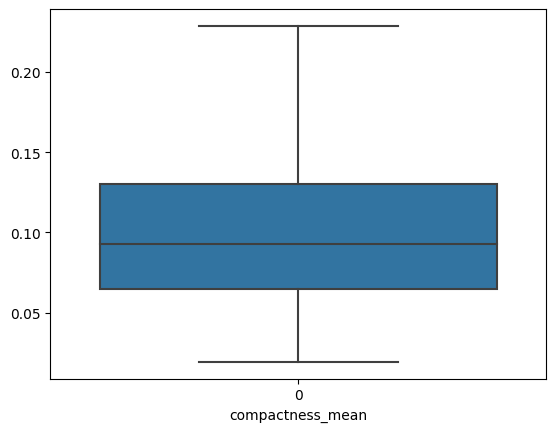

<Figure size 600x400 with 0 Axes>

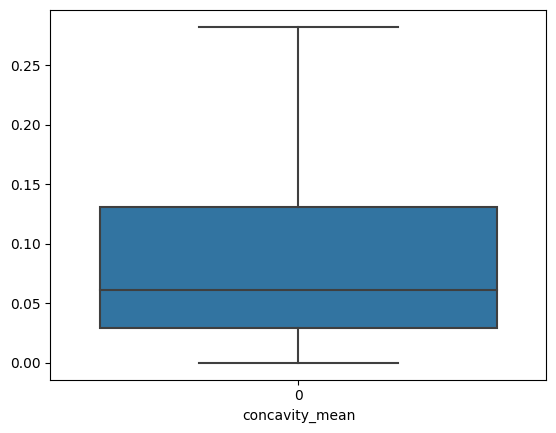

<Figure size 600x400 with 0 Axes>

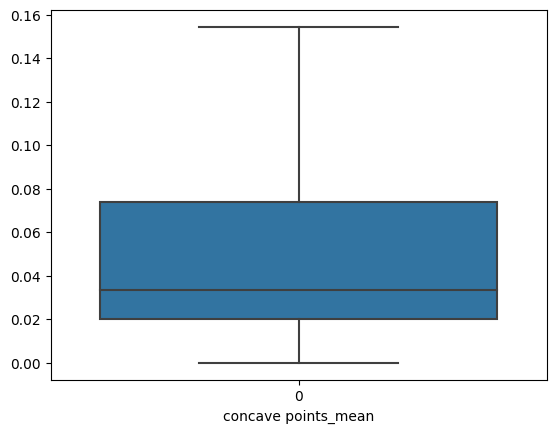

<Figure size 600x400 with 0 Axes>

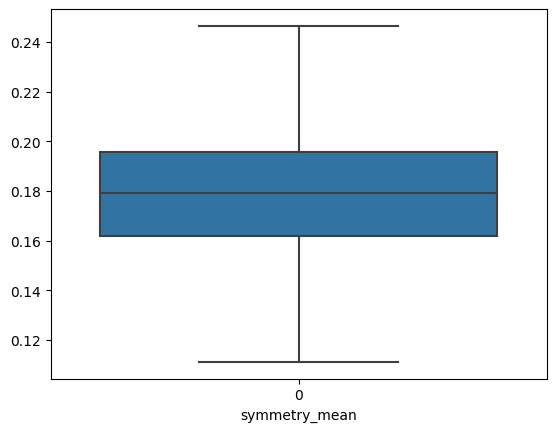

<Figure size 600x400 with 0 Axes>

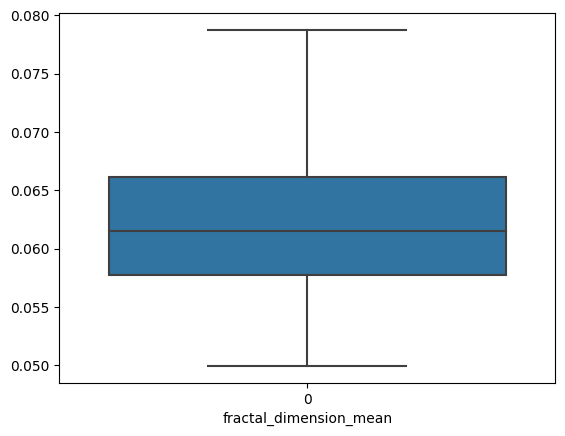

<Figure size 600x400 with 0 Axes>

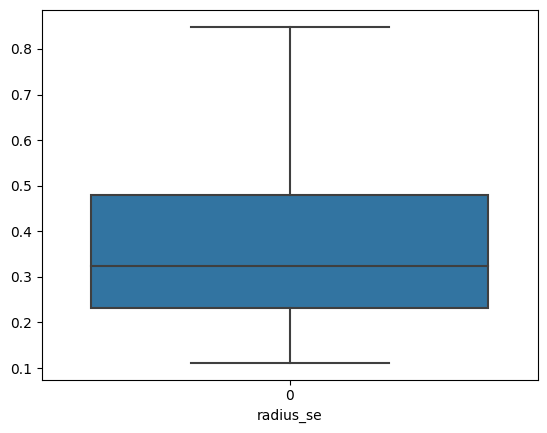

<Figure size 600x400 with 0 Axes>

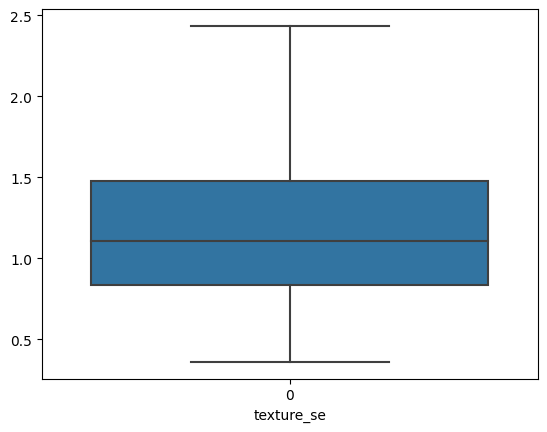

<Figure size 600x400 with 0 Axes>

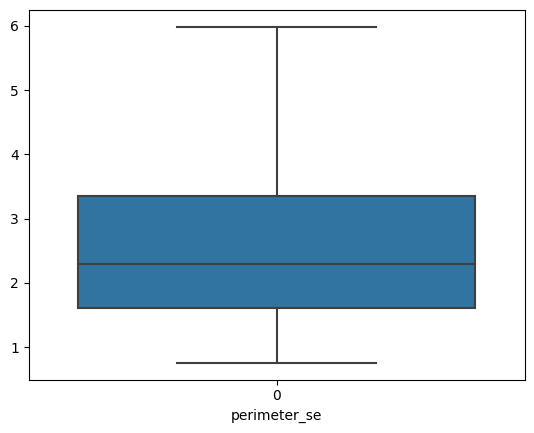

<Figure size 600x400 with 0 Axes>

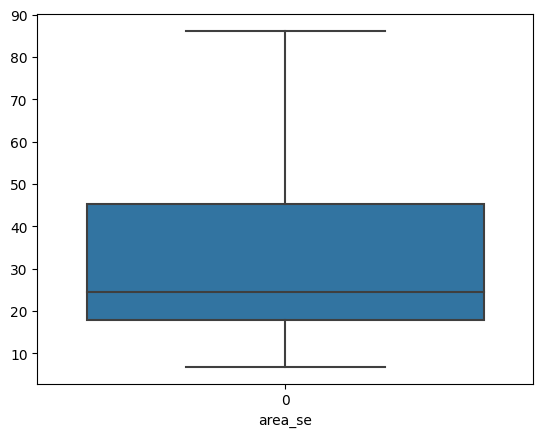

<Figure size 600x400 with 0 Axes>

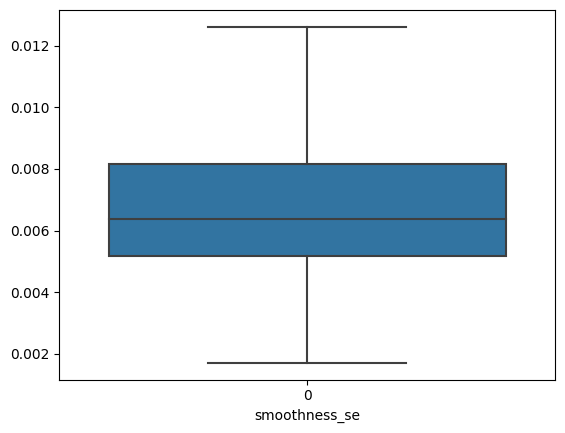

<Figure size 600x400 with 0 Axes>

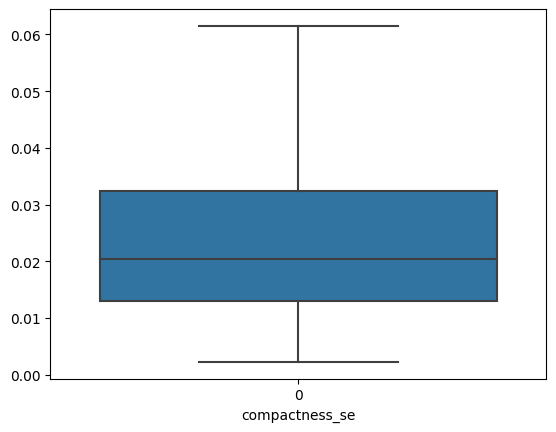

<Figure size 600x400 with 0 Axes>

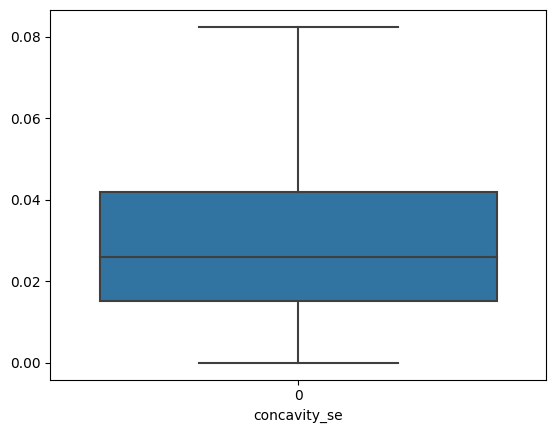

<Figure size 600x400 with 0 Axes>

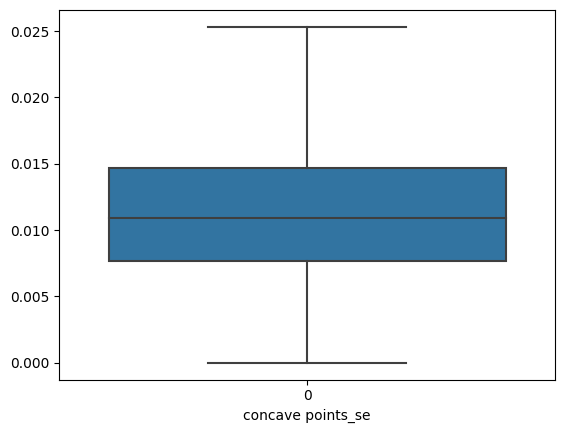

<Figure size 600x400 with 0 Axes>

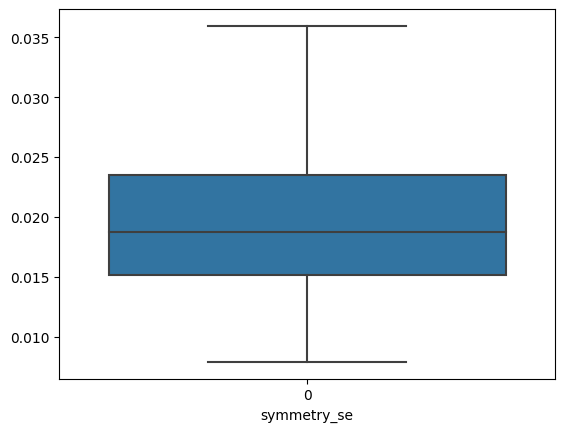

<Figure size 600x400 with 0 Axes>

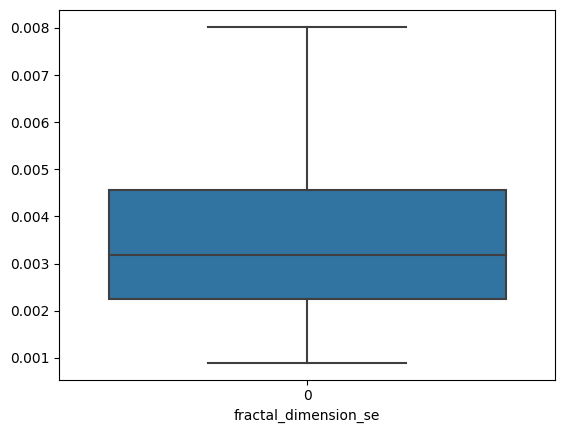

<Figure size 600x400 with 0 Axes>

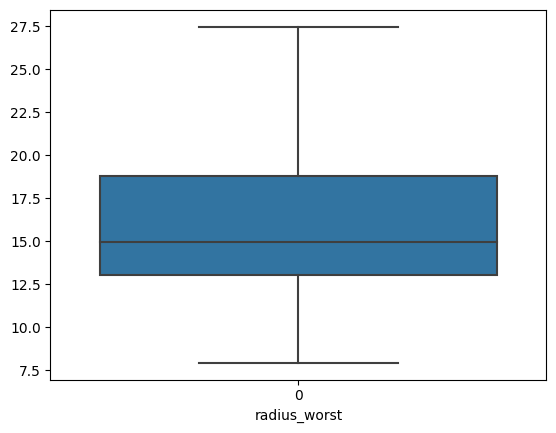

<Figure size 600x400 with 0 Axes>

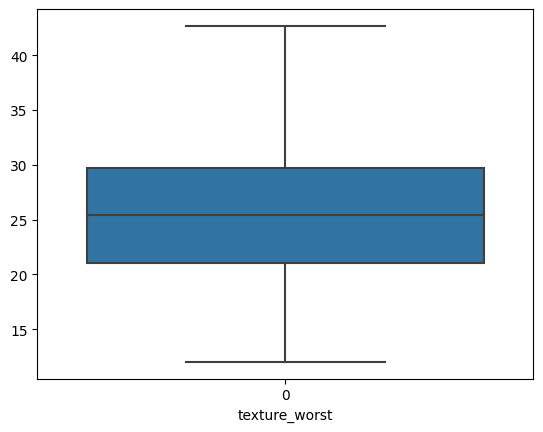

<Figure size 600x400 with 0 Axes>

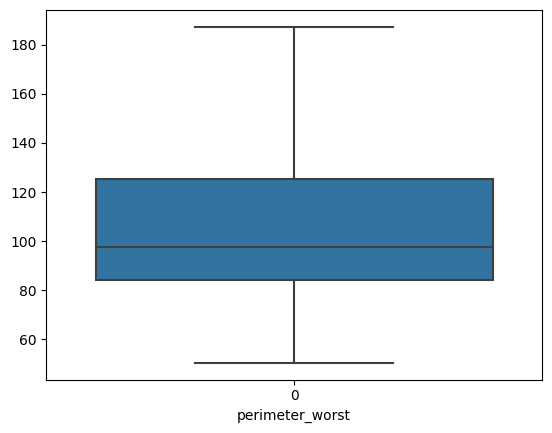

<Figure size 600x400 with 0 Axes>

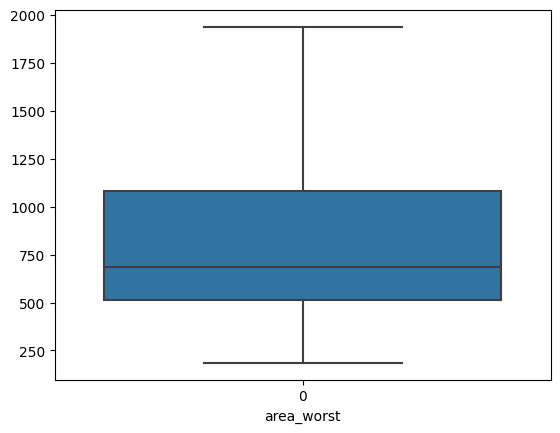

<Figure size 600x400 with 0 Axes>

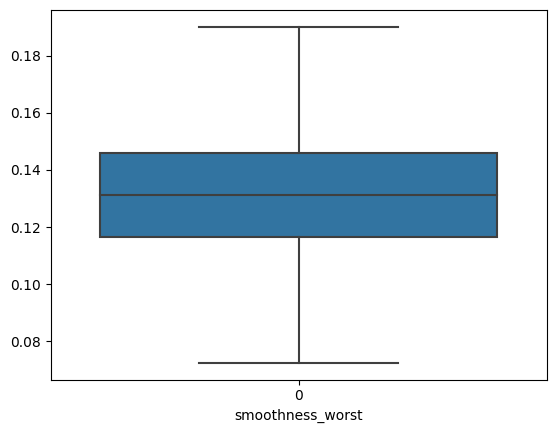

<Figure size 600x400 with 0 Axes>

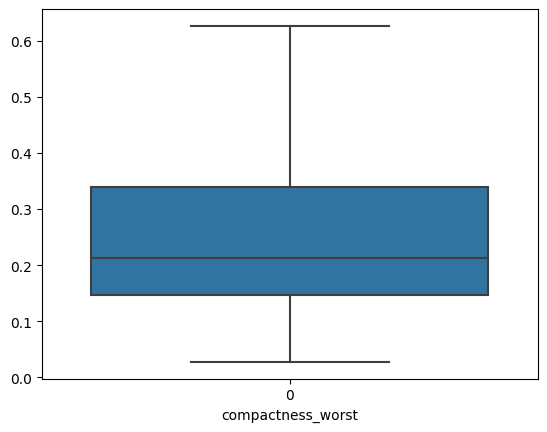

<Figure size 600x400 with 0 Axes>

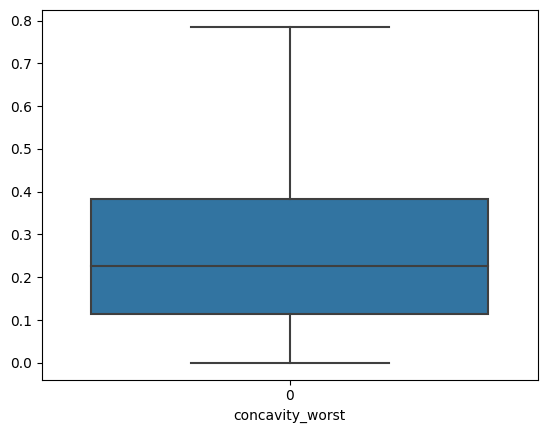

<Figure size 600x400 with 0 Axes>

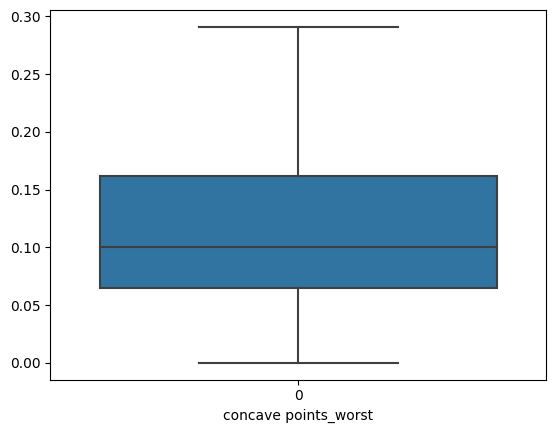

<Figure size 600x400 with 0 Axes>

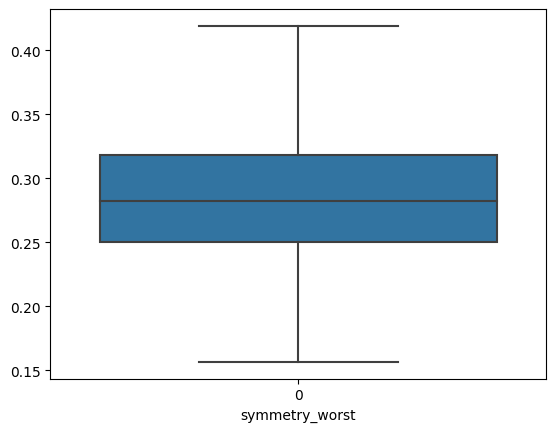

<Figure size 600x400 with 0 Axes>

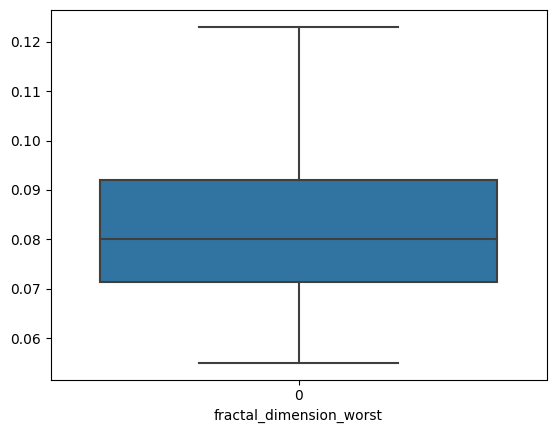

In [109]:
for col in X.columns:
  plt.figure(figsize=(6,4))
  plt.subplots(nrows=1,ncols=1)
  sns.boxplot(X[col])
  plt.xlabel(col)

In [110]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.062916,19.254736,91.543787,639.765202,0.096266,0.103222,0.086937,0.048552,0.180734,0.062604,...,16.183882,25.648453,106.705369,849.907821,0.132209,0.249883,0.268754,0.114606,0.287616,0.083342
std,3.340025,4.187510,23.047218,305.343508,0.013685,0.049386,0.073900,0.037633,0.026067,0.006418,...,4.587249,6.054406,31.957777,475.645240,0.022320,0.142851,0.197461,0.065732,0.053868,0.015993
min,6.981000,9.710000,43.790000,143.500000,0.057975,0.019380,0.000000,0.000000,0.111200,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.072500,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,21.900000,30.245000,147.495000,1326.300000,0.133695,0.228620,0.282410,0.154535,0.246400,0.078750,...,27.460000,42.680000,187.335000,1937.050000,0.190100,0.626950,0.785500,0.291000,0.419150,0.123010


# Scaling the data and spilting into training and testing

In [111]:
import sklearn

In [112]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
scale = MinMaxScaler()
scaled = scale.fit_transform(X)

In [120]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(scaled , y , test_size = 0.2 , random_state=42)

print('X train shape : ',X_train.shape)
print('y train shape : ',y_train.shape)
print('\n')
print('X test shape : ',X_test.shape)
print('y test shape : ',y_test.shape)

X train shape :  (455, 30)
y train shape :  (455,)


X test shape :  (114, 30)
y test shape :  (114,)


# Converting array into tensor and adding a dimension in y to make it two dimensional tensor

In [153]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [150]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.FloatTensor(y_train.values)
y_test = torch.FloatTensor(y_test.values)

In [151]:
print('X train shape : ',X_train.shape)
print('y train shape : ',y_train.shape)
print('\n')
print('X test shape : ',X_test.shape)
print('y test shape : ',y_test.shape)

X train shape :  torch.Size([455, 30])
y train shape :  torch.Size([455])


X test shape :  torch.Size([114, 30])
y test shape :  torch.Size([114])


In [152]:
y_train = torch.unsqueeze(y_train,1)
y_test = torch.unsqueeze(y_test,1)
print('y train shape : ',y_train.shape)
print('y test shape : ',y_test.shape)

y train shape :  torch.Size([455, 1])
y test shape :  torch.Size([114, 1])


# Model Building

In [154]:
class BinaryClassification(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(BinaryClassification,self).__init__()
    self.input_layer = nn.Linear(input_dim , 128)
    self.hidden_layer1 = nn.Linear(128,64)
    self.hidden_layer2 = nn.Linear(64,64)
    self.output_layer = nn.Linear(64,output_dim)

  def forward(self,x):
    x = F.relu(self.input_layer(x))
    x = F.relu(self.hidden_layer1(x))
    x = F.relu(self.hidden_layer2(x))
    x = F.sigmoid(self.output_layer(x))
    return x

In [155]:
input_dim = 30
output_dim = 1
model = BinaryClassification(input_dim , output_dim)

In [156]:
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [157]:
def train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs, train_losses , test_losses):
  for epoch in range(num_epochs):
    optimizer.zero_grad()

    output_train = model(X_train)
    loss_train = criterion(output_train, y_train)


    loss_train.backward()

    optimizer.step()

    output_test = model(X_test)
    loss_test = criterion(output_test, y_test)

    train_losses[epoch] = loss_train.item()
    test_losses[epoch] = loss_test.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")



In [158]:
num_epochs = 100
train_losses = np.zeros(num_epochs)
test_losses = np.zeros(num_epochs)

In [159]:
train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs, train_losses , test_losses)

Epoch 1/100, Train Loss: 0.6868, Test Loss: 0.6634
Epoch 2/100, Train Loss: 0.6650, Test Loss: 0.6155
Epoch 3/100, Train Loss: 0.6206, Test Loss: 0.5374
Epoch 4/100, Train Loss: 0.5480, Test Loss: 0.4272
Epoch 5/100, Train Loss: 0.4473, Test Loss: 0.3101
Epoch 6/100, Train Loss: 0.3377, Test Loss: 0.2082
Epoch 7/100, Train Loss: 0.2469, Test Loss: 0.1529
Epoch 8/100, Train Loss: 0.2007, Test Loss: 0.2366
Epoch 9/100, Train Loss: 0.3184, Test Loss: 0.2329
Epoch 10/100, Train Loss: 0.2948, Test Loss: 0.1438
Epoch 11/100, Train Loss: 0.2042, Test Loss: 0.1395
Epoch 12/100, Train Loss: 0.2177, Test Loss: 0.1449
Epoch 13/100, Train Loss: 0.2201, Test Loss: 0.0897
Epoch 14/100, Train Loss: 0.1438, Test Loss: 0.1525
Epoch 15/100, Train Loss: 0.2077, Test Loss: 0.0943
Epoch 16/100, Train Loss: 0.1408, Test Loss: 0.0951
Epoch 17/100, Train Loss: 0.1387, Test Loss: 0.1202
Epoch 18/100, Train Loss: 0.1582, Test Loss: 0.0758
Epoch 19/100, Train Loss: 0.1066, Test Loss: 0.0865
Epoch 20/100, Train L

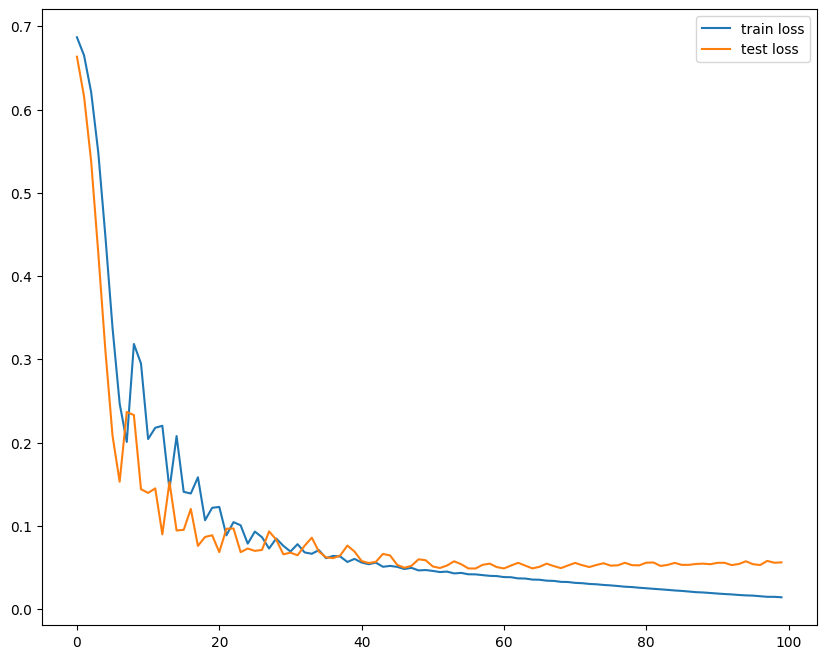

In [161]:
plt.figure(figsize = (10,8))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()